<a href="https://colab.research.google.com/github/wallik2/SCIM_Lecture/blob/main/Intro_Data_Sci/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd



---


---





##1) <u>Create a dataframe</u>



> Create df1



In [24]:
Score = {
    "a" : [4 ,8, 12],        
    "b" : [7, 14, 21],
    "c" : [10, 20, 30]
    }

#Using Dictionary

In [29]:
df1 = pd.DataFrame(Score)

In [30]:
df1
#seem like the indexs started from 0 to 2, but in reality, we want the indexs: 1,2,3

,a,b,c
0,4,7,10
1,8,14,20
2,12,21,30


In [31]:
df1 = pd.DataFrame(Score,index=[1,2,3])

In [32]:
df1

,a,b,c
1,4,7,10
2,8,14,20
3,12,21,30




---



> Create df2
- Using Argument columns (data=...) of Pandas.DataFrame

In [140]:
score_no_column = [[4,6,8],[7,14,21],[10,20,30]]
                   
#Using No Dictionary

In [141]:
df2 = pd.DataFrame(
    data=score_no_column,
    index=[1, 2, 3],
    columns=['a', 'b', 'c']
    )

In [142]:
df2

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30




---



> Create df3
- Similar to df2 but instead of using **list**, we using **Numpy Array**
- Also, we show that The index can also be a string (from index: 1,2,3 to index:subject1,subject2,subject3)

In [40]:
import numpy as np

In [41]:
Data = np.array([[4 ,8, 12],
                 [8, 16, 24],
                 [10, 20, 30]])

In [42]:
df3 = pd.DataFrame(
    data = Data,
    index = ["subject1","subject2","subject3"],
    columns=['a', 'b', 'c'])

In [43]:
df3

,a,b,c
subject1,4,8,12
subject2,8,16,24
subject3,10,20,30




---


Tips: You might wonder how to print the dataframe at once

In [131]:
df1
df2
df3

#not work, it only print the last dataframe (df3)

,a,b,c
1,4,8,12
2,8,16,24
3,10,20,30


In [132]:
display(df1)
display(df2)
display(df3)

#work! We use display to print multiple dataframe at once!

,a,b,c
1,4,7,10
2,8,14,20
3,12,21,30


,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30


,a,b,c
1,4,8,12
2,8,16,24
3,10,20,30




---

---





## 2) <u>Update the DataFrame</u>

In [59]:
df2

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30


In [60]:
df3

,a,b,c
subject1,4,8,12
subject2,8,16,24
subject3,10,20,30




---


> Print the 'specific column' data

In [45]:
#Print the 'specific column' data

print(df3.a)

subject1     4
subject2     8
subject3    10
Name: a, dtype: int64


In [47]:
print(df3['a'])

subject1     4
subject2     8
subject3    10
Name: a, dtype: int64




---


> Print the 'specific Row' data

In [50]:
#For categorical index

print(df3[df3.index=='subject1'])

          a  b   c
subject1  4  8  12


In [51]:
print(df3[df3.index!='subject1'])

           a   b   c
subject2   8  16  24
subject3  10  20  30


In [52]:
#For numerical index
print(df2[df2.index==1])

   a  b  c
1  4  6  8


In [54]:
print(df2[df2.index>1])

    a   b   c
2   7  14  21
3  10  20  30


In [222]:
print(df3[(df3.a<5) | (df3.a>9)])

           a   b    c
subject1   4   8   12
subject3  10  50  100


In [223]:
print(df3[(df3.a>5) & (df3.a<10)])

          a   b   c
subject2  8  16  24




---


> Filter the specific row

In [56]:
print(df3[df3.a<10])

#print only the row that the column a is more than 10

          a   b   c
subject1  4   8  12
subject2  8  16  24


In [57]:
print(df3[(df3.a<5) | (df3.a>9)])

           a   b   c
subject1   4   8  12
subject3  10  20  30


In [58]:
print(df3[(df3.a>5) & (df3.a<10)])

          a   b   c
subject2  8  16  24




---


> Concate the dataframe (by rows)

In [61]:
df4 = pd.concat([df2,df3])
display(df4)

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30
subject1,4,8,12
subject2,8,16,24
subject3,10,20,30


In [62]:
df4 = df4.reset_index()
display(df4)

,index,a,b,c
0,1,4,6,8
1,2,7,14,21
2,3,10,20,30
3,subject1,4,8,12
4,subject2,8,16,24
5,subject3,10,20,30


That's not how it works, We may need to convert the index of df3 to numerical

In [65]:
new_index = [1,2,3]

In [70]:
df3

,a,b,c
subject1,4,8,12
subject2,8,16,24
subject3,10,20,30


In [73]:
df3.index = new_index

In [74]:
df3

,a,b,c
1,4,8,12
2,8,16,24
3,10,20,30


In [123]:
df4 = pd.concat([df2,df3])
display(df4)

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30
1,4,8,12
2,8,16,24
3,10,20,30


In [124]:
df4 = df4.reset_index()
display(df4)

,index,a,b,c
0,1,4,6,8
1,2,7,14,21
2,3,10,20,30
3,1,4,8,12
4,2,8,16,24
5,3,10,20,30


In [125]:
df4 = df4.drop('index',1)            
#must write 1, otherwise it will set default number =0 in which it will find the row named 'index'

In [129]:
df4

#You don't want the index start from 0, but 1 
#So, next line will be starting from 1

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30
4,4,8,12
5,8,16,24
6,10,20,30


In [126]:
df4.index += 1

In [128]:
df4

,a,b,c
1,4,6,8
2,7,14,21
3,10,20,30
4,4,8,12
5,8,16,24
6,10,20,30


In [127]:
df4.index

RangeIndex(start=1, stop=7, step=1)



---


> Drop the specific row

In [89]:
df4 = df4.drop(3,0) 
#drop row index = 3

In [91]:
df4

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30
4,8,16,24




---


> Concate the dataframe (by columns)

In [94]:
display(pd.concat([df2,df3],axis=1))

,a,b,c,a,b,c
1,4,6,8,4,8,12
2,7,14,21,8,16,24
3,10,20,30,10,20,30




---
> Exploratory Analysis stuff
- containing min, max, sum ,mean, median, mode, variance, standard deviation of EACH COLUMN



In [98]:
df1.min()

#print minimum of each column

a     4
b     7
c    10
dtype: int64

In [99]:
df1.max()

a    12
b    21
c    30
dtype: int64

In [102]:
df1.sum()

a    24
b    42
c    60
dtype: int64

In [103]:
df1.mean()

a     8.0
b    14.0
c    20.0
dtype: float64

In [104]:
df1.median()

a     8.0
b    14.0
c    20.0
dtype: float64

In [105]:
df1.mode()

,a,b,c
0,4,7,10
1,8,14,20
2,12,21,30


In [106]:
df1.var()

a     16.0
b     49.0
c    100.0
dtype: float64

In [110]:
df1.std()

a     4.0
b     7.0
c    10.0
dtype: float64



---

> Sorting
- include Ascending and Descending





In [112]:
df1.sort_values('a',ascending=True)

#Ascending

,a,b,c
1,4,7,10
2,8,14,20
3,12,21,30


In [ ]:
df1.sort_values('a',ascending=False)

#Descending

> Rename the column

In [130]:
df_Test = df1.rename(columns = {'a':'Test'})
display(df1)
display(df_Test)

#The reason to use display is to show the more than 1 dataframe at once!!!

,a,b,c
1,4,7,10
2,8,14,20
3,12,21,30


,Test,b,c
1,4,7,10
2,8,14,20
3,12,21,30


In [138]:
df_Test = df1.rename(index = {1:5})               #rename index=5 where index=1 

display(df_Test)

#Rename index 1 to 5

,a,b,c
5,4,7,10
2,8,14,20
3,12,21,30


In [139]:
print(df_Test.sort_index())

    a   b   c
2   8  14  20
3  12  21  30
5   4   7  10




---
## 3) More Extra Examples (Reviews)



Let me recreate the df1 and df2 for some purpose

In [149]:
df1 = pd.DataFrame(
    [[4 ,6, 8],
    [7, 14, 21],
     [10, 20, 30]],
     columns=['a', 'b', 'c']
    )

In [150]:
Data = np.array([[4 ,8, 12],[8, 16, 24],[10, 50, 100]])

df2 = pd.DataFrame(data = Data,
                   columns=['a', 'b', 'c'])

In [151]:
df1

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30


In [152]:
df2

,a,b,c
0,4,8,12
1,8,16,24
2,10,50,100


In [153]:
DF = pd.concat([df1,df2])
display(DF)

DF = DF.reset_index()
print("After using reset_index() function,")
display(DF)

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30
0,4,8,12
1,8,16,24
2,10,50,100


After using reset_index() function,


,index,a,b,c
0,0,4,6,8
1,1,7,14,21
2,2,10,20,30
3,0,4,8,12
4,1,8,16,24
5,2,10,50,100




---


> Drop the column based on its name

In [154]:
#Alternative 1:

DF = DF.drop(['index'], axis=1)

DF

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30
3,4,8,12
4,8,16,24
5,10,50,100


Or Use this alternative if you lazy to reassign DF
- Inplace=True means it ,your drop action will be updated

In [156]:
#Alternative 2:

#DF.drop(['index'], axis=1,inplace= True) 





---


> Show a column & row from DataFrame 
- using its name

In [193]:
DF

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30
3,4,8,12
4,8,16,24
5,10,50,100


1. Call a column by its name 

In [157]:
# 1) Single column

DF['a']

0     4
1     7
2    10
3     4
4     8
5    10
Name: a, dtype: int64

In [158]:
# 2) Multiple columns

DF[['a','c']]

,a,c
0,4,8
1,7,21
2,10,30
3,4,12
4,8,24
5,10,100


2. Call a row by using its name

In [192]:
DF[DF.index == 4]

,a,b,c
4,8,16,24




---


> Show a column or row or both column and row from DataFrame
- using loc and iloc

In [169]:
df3 = pd.DataFrame(
    data = Data,
    index = ["subject1","subject2","subject3"],
    columns=['a', 'b', 'c'])

In [172]:
df3

,a,b,c
subject1,4,8,12
subject2,8,16,24
subject3,10,50,100


#### Using loc 

In [183]:
#Call for only a column

df3.loc['subject1']

a     4
b     8
c    12
Name: subject1, dtype: int64

In [178]:
#Call for only a row

df3.loc[:,'a']

subject1     4
subject2     8
subject3    10
Name: a, dtype: int64

In [177]:
#Call for both a column and row

df3.loc['subject1','a']

4

In [215]:
#Call multiple row and column
df3.loc[['subject1','subject2'],['a','b','c']]

,a,b,c
subject1,4,8,12
subject2,8,16,24


#### Using iLoc

In [184]:
#Call for only a column

df3.iloc[0]

a     4
b     8
c    12
Name: subject1, dtype: int64

In [185]:
#Call for only a row

df3.iloc[:, 0]

subject1     4
subject2     8
subject3    10
Name: a, dtype: int64

In [239]:
#Call for both a column and row

df3.iloc[0,0]

4

In [248]:
#Call multiple row and column
df3.iloc[[0,1],0:2]

#Note that the reason why 3rd column doesn't show out is because 0:2 exclude the 3rd column

,a,b
subject1,4,8
subject2,8,16




---
> Call the name of column


In [208]:
DF.columns

Index(['a', 'b', 'c', 'Test(a+c)'], dtype='object')


In [211]:
DF.columns[1]

'b'



---

> Call the name of row (index)




In [212]:
DF.index

Index([0, 1, 2, 3, 4, 5, 'Test'], dtype='object')



---

> Create a new column





In [202]:
DF

,a,b,c
0,4,6,8
1,7,14,21
2,10,20,30
3,4,8,12
4,8,16,24
5,10,50,100


In [203]:
DF["Test(a+c)"]= DF.a+DF['c']

In [204]:
DF

,a,b,c,Test(a+c)
0,4,6,8,12
1,7,14,21,28
2,10,20,30,40
3,4,8,12,16
4,8,16,24,32
5,10,50,100,110




---

> Create a new row





In [205]:
DF.loc["Test"] = DF.iloc[0]+DF.iloc[5]

In [206]:
DF

,a,b,c,Test(a+c)
0,4,6,8,12
1,7,14,21,28
2,10,20,30,40
3,4,8,12,16
4,8,16,24,32
5,10,50,100,110
Test,14,56,108,122




---

> Select by conditions




In [218]:
DF

,a,b,c,Test(a+c)
0,4,6,8,12
1,7,14,21,28
2,10,20,30,40
3,4,8,12,16
4,8,16,24,32
5,10,50,100,110
Test,14,56,108,122


In [220]:
DF[DF['a']>=10]

,a,b,c,Test(a+c)
2,10,20,30,40
5,10,50,100,110
Test,14,56,108,122


In [221]:
DF[(DF['a']>=10) & (DF['c']>=30)]

,a,b,c,Test(a+c)
2,10,20,30,40
5,10,50,100,110
Test,14,56,108,122


In [224]:
DF[(DF['a']>=10) | (DF['c']>=30)]

,a,b,c,Test(a+c)
2,10,20,30,40
5,10,50,100,110
Test,14,56,108,122




---
> Graphing


In [225]:
import matplotlib.pyplot as plt

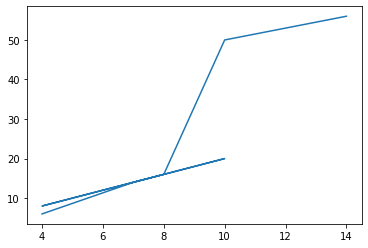

In [226]:
plt.plot(DF['a'],DF['b'])
plt.show()

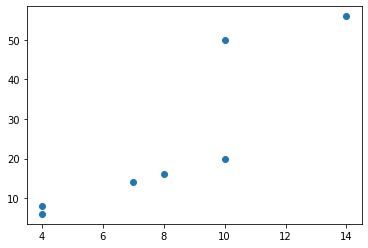

In [227]:
plt.scatter(DF['a'],DF['b'])



---

Copy DataFrame





In [228]:
DF2 = DF.copy()

In [235]:
DF2

,a,b,c,TEST,Test(a+c)
0,4,6,8,NaN,12
1,7,14,21,NaN,28
2,10,20,30,NaN,40
3,4,8,12,NaN,16
4,8,16,24,NaN,32
5,10,50,100,NaN,110
Test,14,56,108,NaN,122




---
Create a new column with NaN value


In [229]:
DF2["TEST"] = np.nan

In [230]:
DF2

,a,b,c,Test(a+c),TEST
0,4,6,8,12,NaN
1,7,14,21,28,NaN
2,10,20,30,40,NaN
3,4,8,12,16,NaN
4,8,16,24,32,NaN
5,10,50,100,110,NaN
Test,14,56,108,122,NaN




---

> Sort the column




In [236]:
cols = ["a","b","c","TEST","Test(a+c)"]
DF2 = DF2[cols]

In [237]:
DF2

,a,b,c,TEST,Test(a+c)
0,4,6,8,NaN,12
1,7,14,21,NaN,28
2,10,20,30,NaN,40
3,4,8,12,NaN,16
4,8,16,24,NaN,32
5,10,50,100,NaN,110
Test,14,56,108,NaN,122
